<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/Candidate/TIC_359122929_Vetting_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [3]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
# lc_0.csv is made for slected sectors or specifically made for this one
data = pd.read_csv("lc_2.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error)#.bin(time_bin_size=0.006)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 359122929
period = 5.85026291470796  # Orbital period in days
epoch = 1931.66940453855
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 0.35]
folded_lc = folded_lc[folded_lc.time > -0.35]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_359122929_all_sector_lightcurve.csv


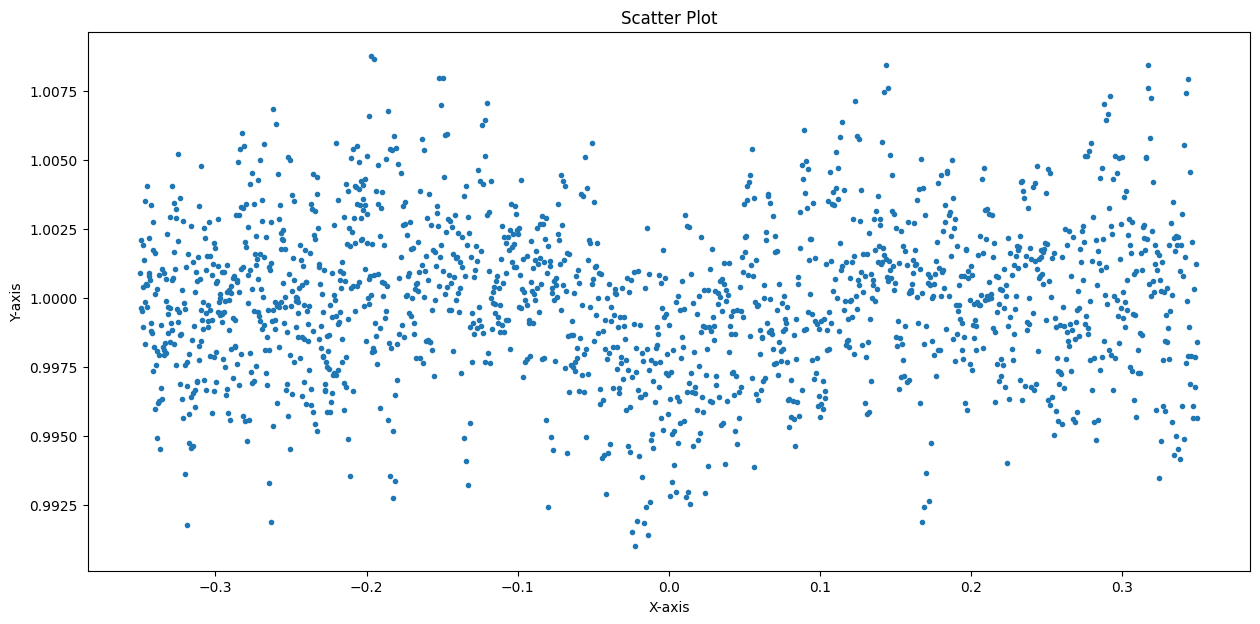

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [5]:
ID = 359122929
sectors = np.array([23])
target = tr.target(ID=ID, sectors=sectors)

Sector 23


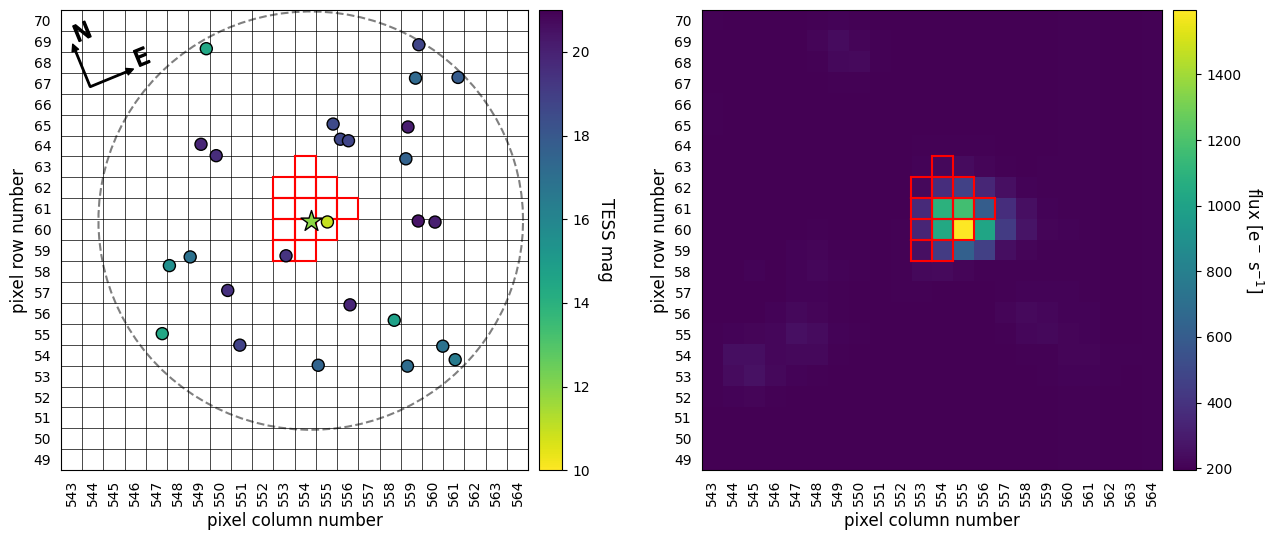

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,359122929,11.8992,10.471,9.810,9.590,194.592681,26.504476,0.482237,0.484212,3520.00,16.969800,0.000,0.000
1,359122928,10.9734,9.784,9.071,8.890,194.596976,26.502526,0.589837,0.602147,3825.00,17.040400,15.514,116.897
2,954156675,19.3376,NaN,NaN,NaN,194.583001,26.498362,NaN,NaN,5558.00,0.033916,38.172,234.790
3,359122932,18.6597,16.570,15.864,15.898,194.607814,26.521316,NaN,NaN,NaN,NaN,77.795,38.799
4,954156678,18.7448,NaN,NaN,NaN,194.609803,26.520158,NaN,NaN,3760.00,0.955936,78.929,44.330
5,954156671,19.8815,NaN,NaN,NaN,194.595559,26.480212,NaN,NaN,NaN,0.701941,87.838,173.940
6,359122935,18.5175,16.822,16.488,16.315,194.607229,26.525711,NaN,NaN,3679.00,1.447360,89.670,31.507
7,954156674,19.4694,NaN,NaN,NaN,194.564484,26.495656,NaN,NaN,4022.00,1.273510,96.232,250.740
8,954156672,20.4119,NaN,NaN,NaN,194.621095,26.493873,NaN,NaN,NaN,0.798622,99.183,112.627
9,954156676,17.6054,NaN,NaN,NaN,194.623379,26.510168,NaN,NaN,7566.00,0.112078,100.996,78.287


In [6]:
ap_23 = np.array([[553.0, 59.0], [553.0, 60.0], [553.0, 61.0], [553.0, 62.0], [554.0,
        59.0], [554.0, 60.0], [554.0, 61.0], [554.0, 62.0], [554.0, 63.0], [555.0,
        60.0], [555.0, 61.0], [555.0, 62.0], [556.0, 61.0]])

apertures = np.array([ap_23])

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

In [9]:
tdepth = 2.326 / 1000
target.calc_depths(tdepth=tdepth, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,359122929,11.8992,10.471,9.810,9.590,194.592681,26.504476,0.482237,0.484212,3520.00,16.969800,0.000,0.000,3.423595e-01,0.006794
1,359122928,10.9734,9.784,9.071,8.890,194.596976,26.502526,0.589837,0.602147,3825.00,17.040400,15.514,116.897,6.574370e-01,0.003538
2,954156675,19.3376,NaN,NaN,NaN,194.583001,26.498362,NaN,NaN,5558.00,0.033916,38.172,234.790,1.895513e-04,0.000000
3,359122932,18.6597,16.570,15.864,15.898,194.607814,26.521316,NaN,NaN,NaN,NaN,77.795,38.799,7.933902e-06,0.000000
4,954156678,18.7448,NaN,NaN,NaN,194.609803,26.520158,NaN,NaN,3760.00,0.955936,78.929,44.330,3.634879e-06,0.000000
5,954156671,19.8815,NaN,NaN,NaN,194.595559,26.480212,NaN,NaN,NaN,0.701941,87.838,173.940,1.076540e-08,0.000000
6,359122935,18.5175,16.822,16.488,16.315,194.607229,26.525711,NaN,NaN,3679.00,1.447360,89.670,31.507,2.278349e-06,0.000000
7,954156674,19.4694,NaN,NaN,NaN,194.564484,26.495656,NaN,NaN,4022.00,1.273510,96.232,250.740,2.217577e-08,0.000000
8,954156672,20.4119,NaN,NaN,NaN,194.621095,26.493873,NaN,NaN,NaN,0.798622,99.183,112.627,4.676628e-09,0.000000
9,954156676,17.6054,NaN,NaN,NaN,194.623379,26.510168,NaN,NaN,7566.00,0.112078,100.996,78.287,1.784985e-08,0.000000


In [20]:
%%time

# read in the light curve
lc = pd.read_csv(f"TIC_{ID}_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

Calculating TP scenario probabilitiey for 359122929.
Calculating EB and EBx2P scenario probabilities for 359122929.
Calculating PTP scenario probability for 359122929.
Calculating PEB and PEBx2P scenario probabilities for 359122929.
Calculating STP scenario probability for 359122929.
Calculating SEB and SEBx2P scenario probabilities for 359122929.
Calculating DTP scenario probability for 359122929.
Calculating DEB and DEBx2P scenario probabilities for 359122929.
Calculating BTP scenario probability for 359122929.
Calculating BEB and BEBx2P scenario probabilities for 359122929.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 359122928.
CPU times: user 1min 13s, sys: 2.26 s, total: 1min 16s
Wall time: 59.9 s


In [21]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = 0.80942355
NFPP = 0.79988822


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,359122929,TP,0.482237,0.484212,5.850263,89.277887,0.204191,0.317222,133.966389,4.273383,0.000000,0.000000,1.599080e-01
1,359122929,EB,0.482237,0.484212,5.850263,86.092342,1.721010,0.101024,53.197939,0.000000,0.451303,0.449747,2.988428e-06
2,359122929,EBx2P,0.482237,0.484212,11.700526,87.853570,0.455515,0.778625,146.283471,0.000000,0.481126,0.481258,1.686523e-03
3,359122929,PTP,0.482237,0.484212,5.850263,89.588513,0.157106,0.164823,185.554437,4.311749,0.000000,0.000000,1.853579e-02
4,359122929,PEB,0.482237,0.484212,5.850263,86.097500,1.765789,0.082924,37.535814,0.000000,0.437813,0.436569,8.976153e-07
5,359122929,PEBx2P,0.482237,0.484212,11.700526,88.211396,0.568987,0.668304,149.977908,0.000000,0.462940,0.461622,7.567690e-04
6,359122929,STP,0.478192,0.477993,5.850263,89.775602,0.078191,0.186090,154.249251,5.585544,0.000000,0.000000,1.640115e-03
7,359122929,SEB,0.134975,0.164972,5.850263,88.797207,0.095585,0.931692,157.434503,0.000000,0.046006,0.100000,3.864921e-04
8,359122929,SEBx2P,0.308897,0.325424,11.700526,88.850864,0.682099,0.581474,169.634654,0.000000,0.308825,0.325363,7.423264e-04
9,359122929,DTP,0.482237,0.484212,5.850263,89.937555,0.032148,0.565685,239.995218,4.266615,0.000000,0.000000,1.213264e-02


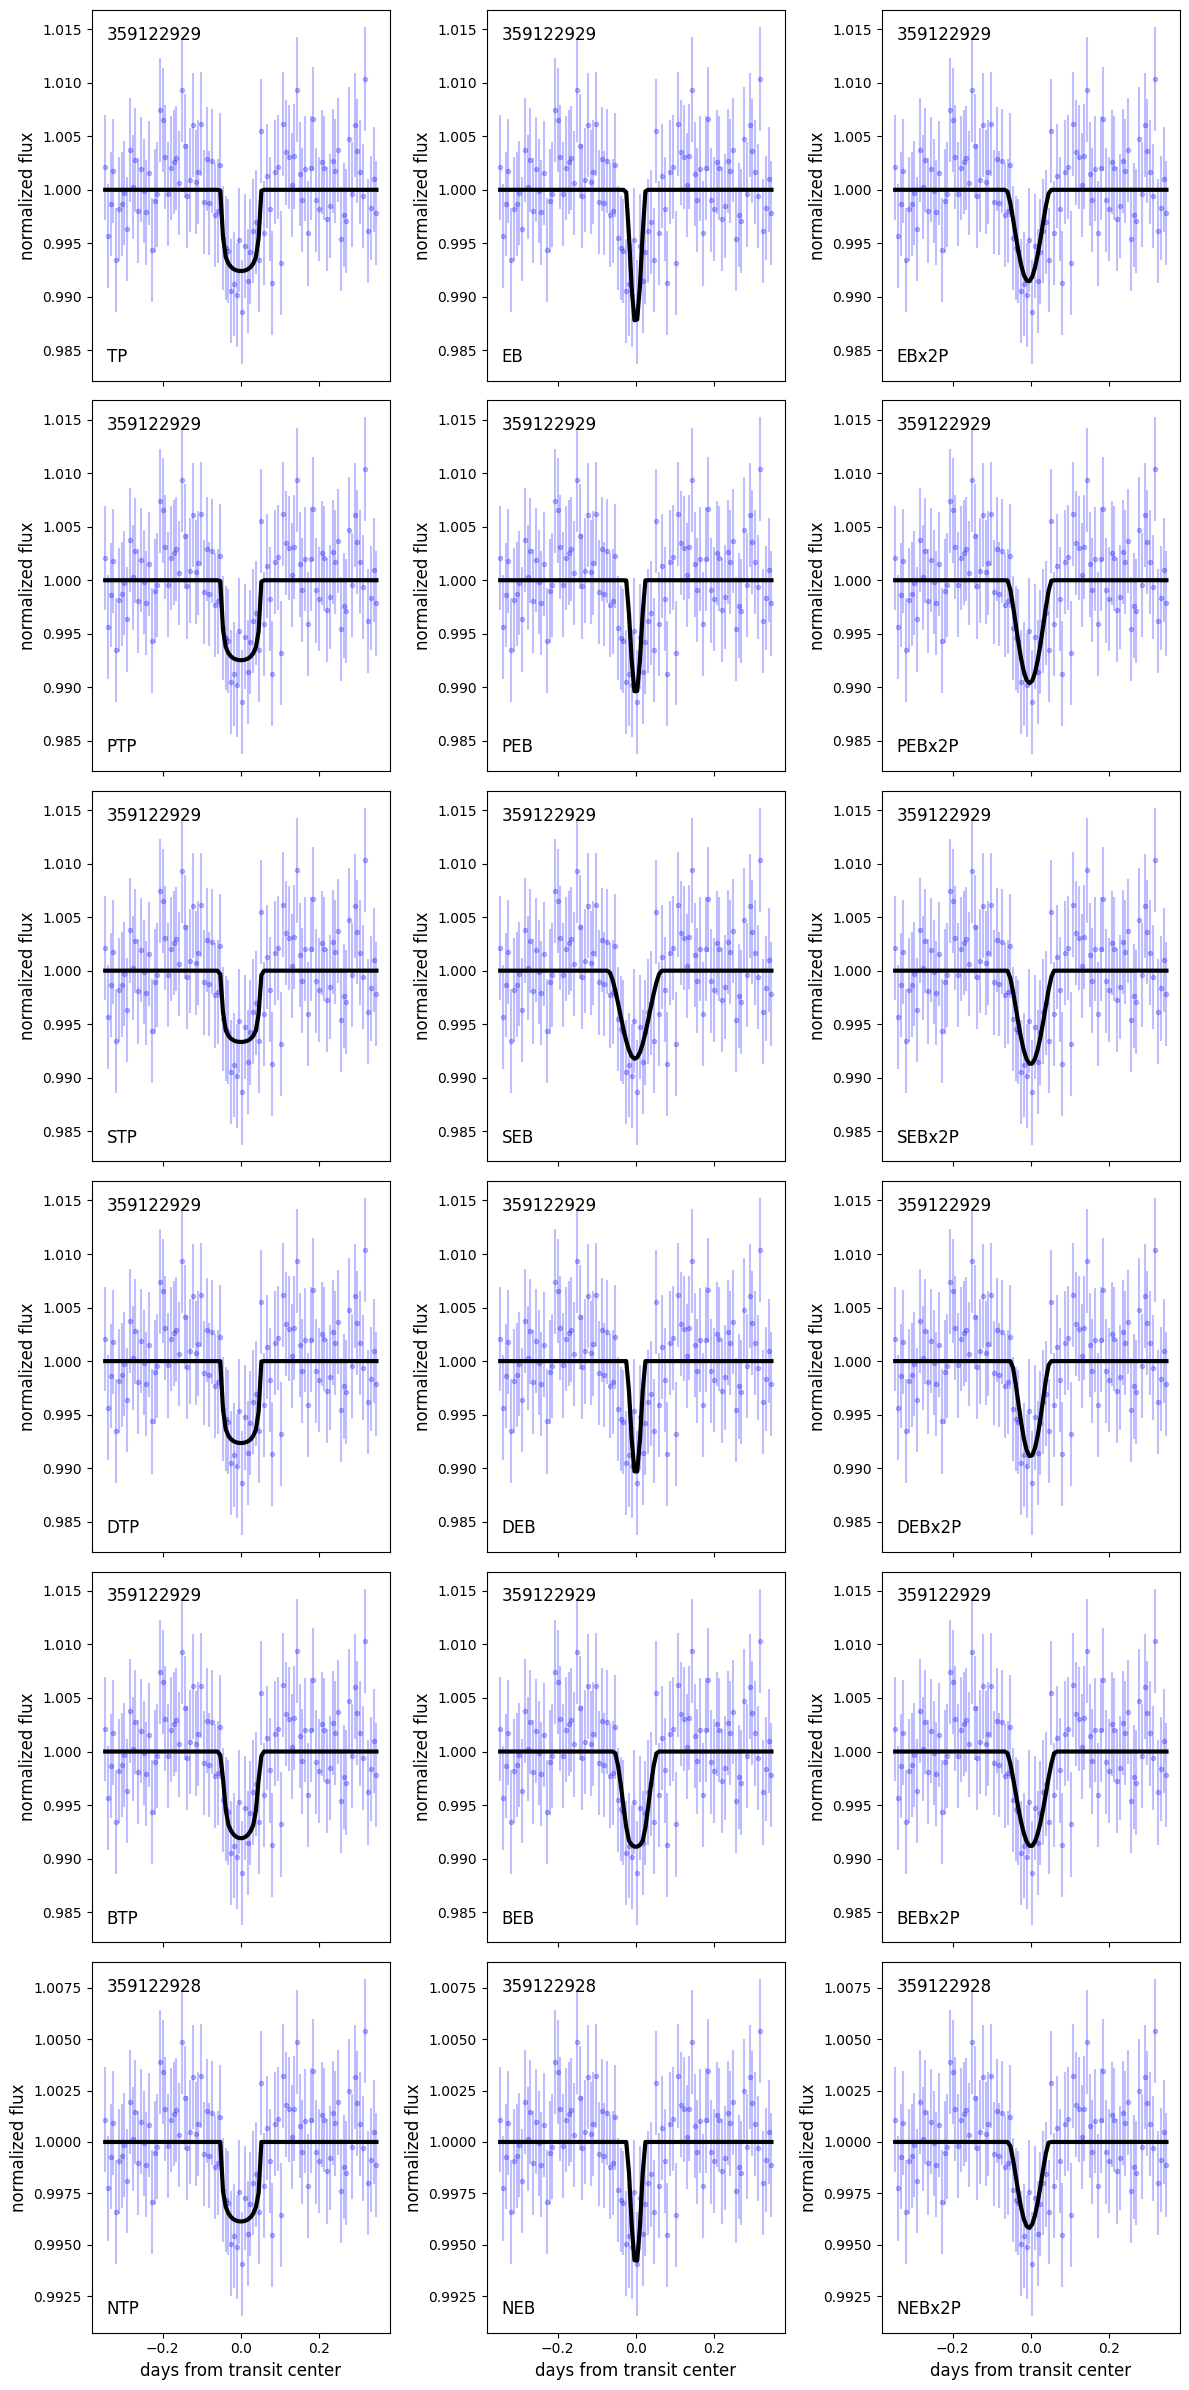

In [22]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [23]:
%%time

FPPs = np.zeros(20)
NFPPs = np.zeros(20)
for i in range(20):
    target.calc_probs(time=lc.time.value,
                      flux_0=lc.flux.value,
                      flux_err_0=np.mean(lc.flux_err.value),
                      P_orb=P_orb,
                      parallel=True,
                      verbose=0)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP

meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

FPP = 0.8067363130204057 +/- 0.0038689551145591992
NFPP = 0.7972052430461745 +/- 0.003917261452263943
CPU times: user 24min 36s, sys: 34.3 s, total: 25min 10s
Wall time: 19min 19s


Our final conclusion about this specified planet of TIC 359122929 is that it is a false positive (according to the range of FPP and NFPP set by TRICERATOPS).